# Temperature Forecast Project using ML

In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# get the data

In [2]:
df = pd.read_csv("temperature.csv", parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-30,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
2017-08-30,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
2017-08-30,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
NaT,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
NaT,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.shape

(7752, 24)

In [6]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null

In [8]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [10]:
df['lon'].nunique()

25

# Checking columns in our dataframe

In [11]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [12]:
df['station'].nunique()

25

In [13]:
df.isnull().any()

station              True
Present_Tmax         True
Present_Tmin         True
LDAPS_RHmin          True
LDAPS_RHmax          True
LDAPS_Tmax_lapse     True
LDAPS_Tmin_lapse     True
LDAPS_WS             True
LDAPS_LH             True
LDAPS_CC1            True
LDAPS_CC2            True
LDAPS_CC3            True
LDAPS_CC4            True
LDAPS_PPT1           True
LDAPS_PPT2           True
LDAPS_PPT3           True
LDAPS_PPT4           True
lat                 False
lon                 False
DEM                 False
Slope               False
Solar radiation     False
Next_Tmax            True
Next_Tmin            True
dtype: bool

# Now shape

In [14]:
df.shape

(7752, 24)

In [15]:
temp_df=df.loc[:,['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','LDAPS_LH', 'lat', 'lon','Next_Tmax','Next_Tmin']]
temp_df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,lat,lon,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,69.451805,37.6046,126.991,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,51.937448,37.6046,127.032,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,20.573050,37.5776,127.058,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,65.727144,37.6450,127.022,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,107.965535,37.5507,127.135,31.2,22.5


In [16]:
temp_df.shape

(7752, 11)

In [17]:
temp_df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_LH', 'lat', 'lon',
       'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Checking is there any null values in dataset

In [18]:
temp_df.isnull().any()

Present_Tmax         True
Present_Tmin         True
LDAPS_RHmin          True
LDAPS_RHmax          True
LDAPS_Tmax_lapse     True
LDAPS_Tmin_lapse     True
LDAPS_LH             True
lat                 False
lon                 False
Next_Tmax            True
Next_Tmin            True
dtype: bool

In [19]:
temp_df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_LH            75
lat                  0
lon                  0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Ploting all the column values

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

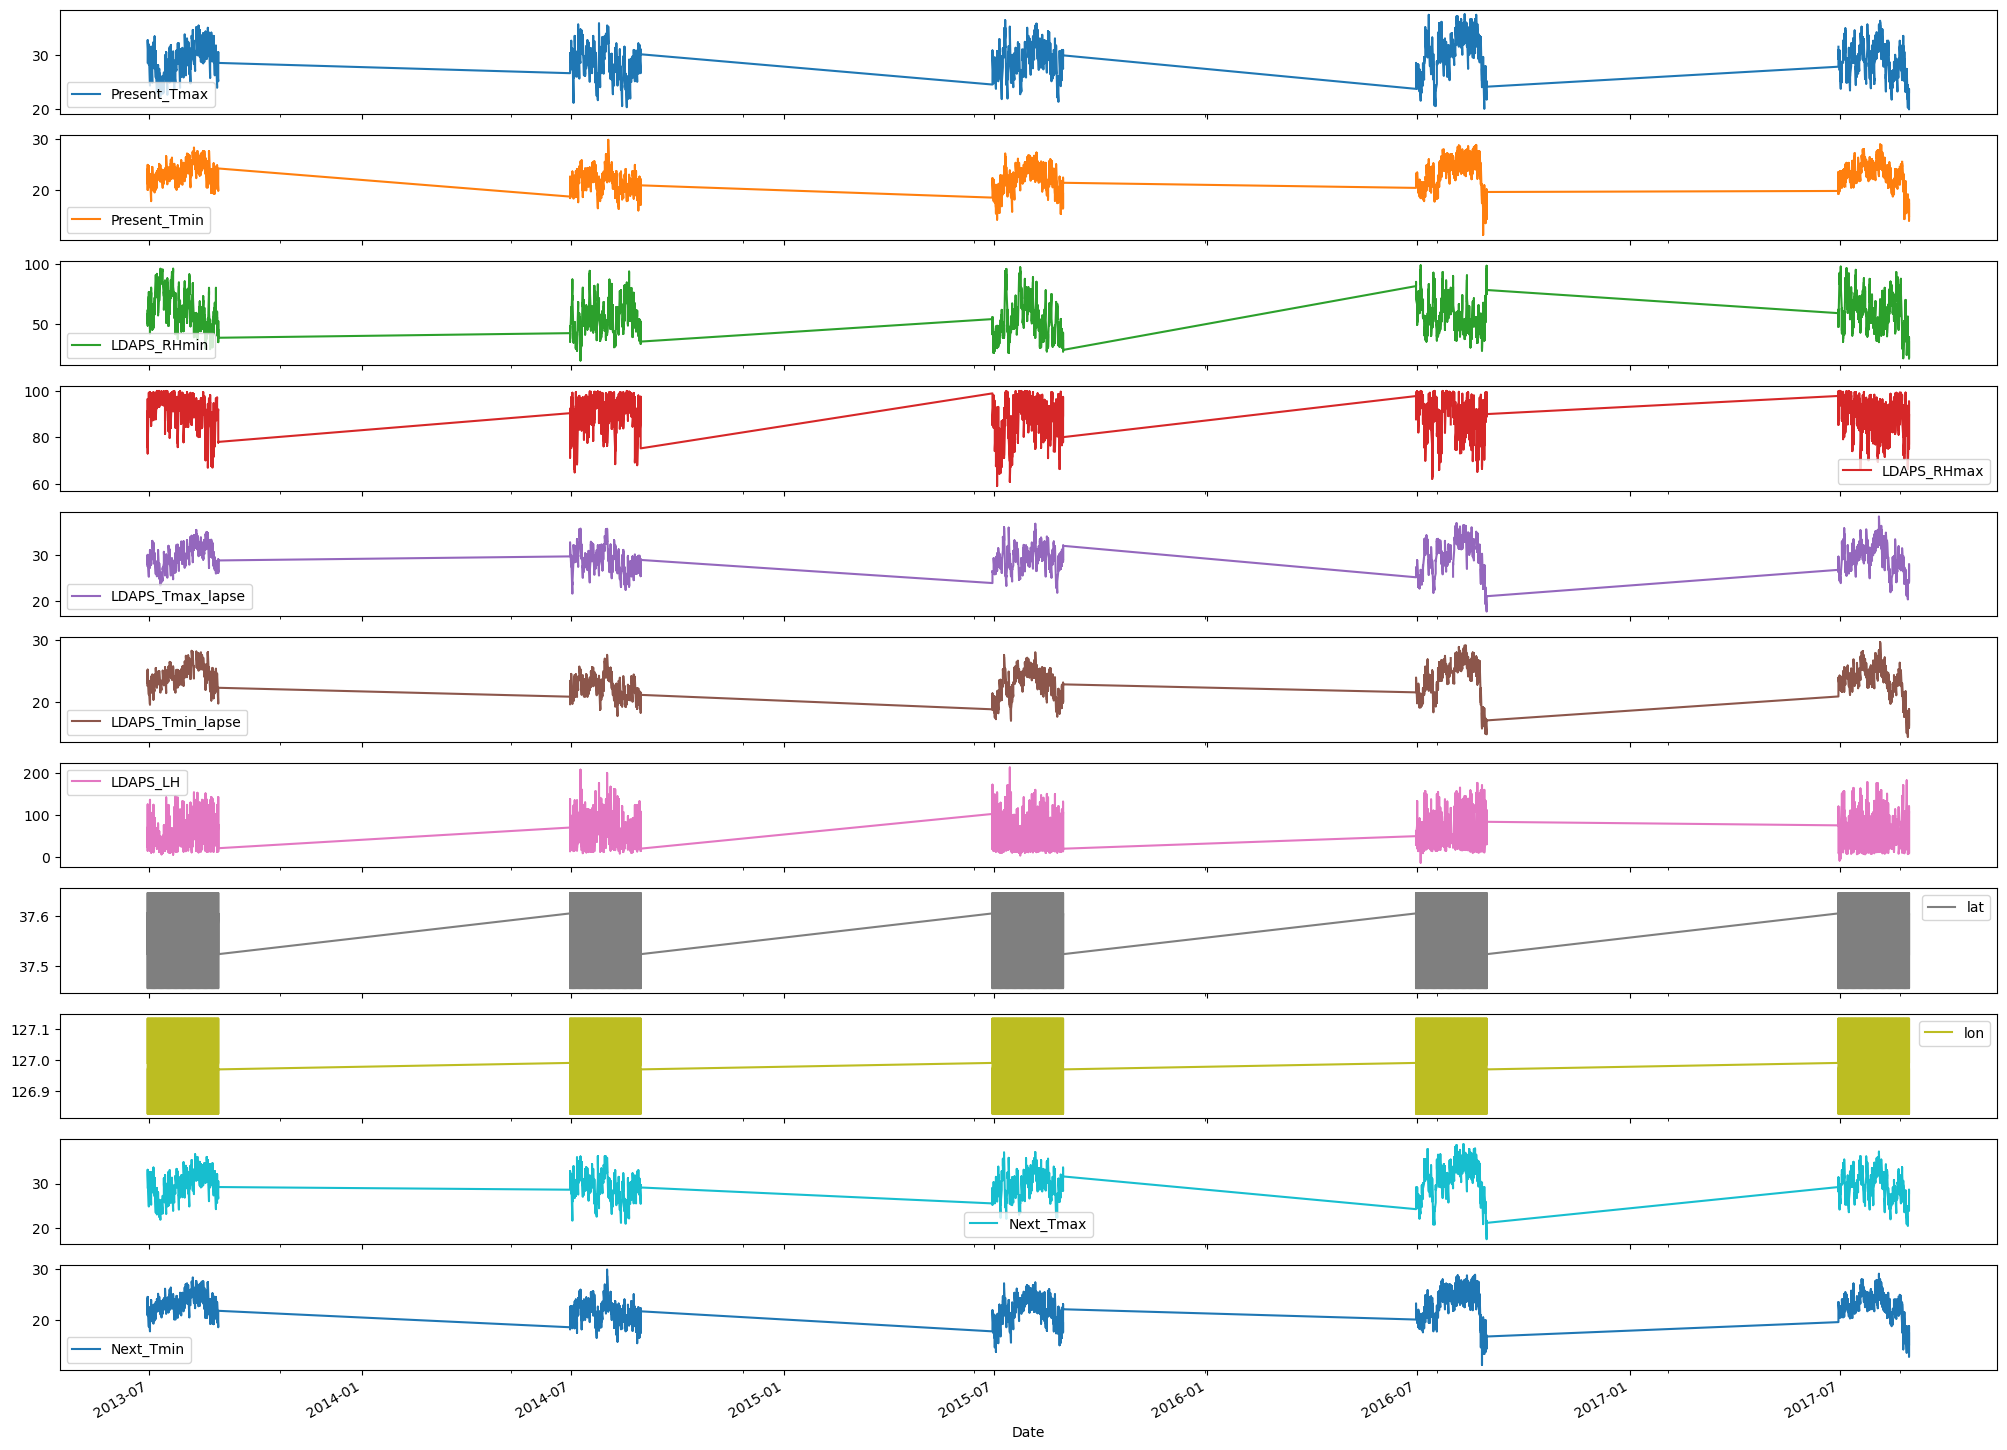

In [20]:
temp_df.plot(subplots=True, figsize=(25,20))

In [21]:
temp_df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,lat,lon,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,69.451805,37.6046,126.991,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,51.937448,37.6046,127.032,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,20.573050,37.5776,127.058,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,65.727144,37.6450,127.022,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,107.965535,37.5507,127.135,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,72.058294,37.5372,126.891,28.3,18.1
2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,47.241457,37.5237,126.909,28.6,18.8
2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,9.090034,37.5237,126.970,27.8,17.4


array([[<Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>],
       [<Axes: title={'center': 'LDAPS_RHmax'}>,
        <Axes: title={'center': 'LDAPS_Tmax_lapse'}>,
        <Axes: title={'center': 'LDAPS_Tmin_lapse'}>],
       [<Axes: title={'center': 'LDAPS_LH'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>],
       [<Axes: title={'center': 'Next_Tmax'}>,
        <Axes: title={'center': 'Next_Tmin'}>, <Axes: >]], dtype=object)

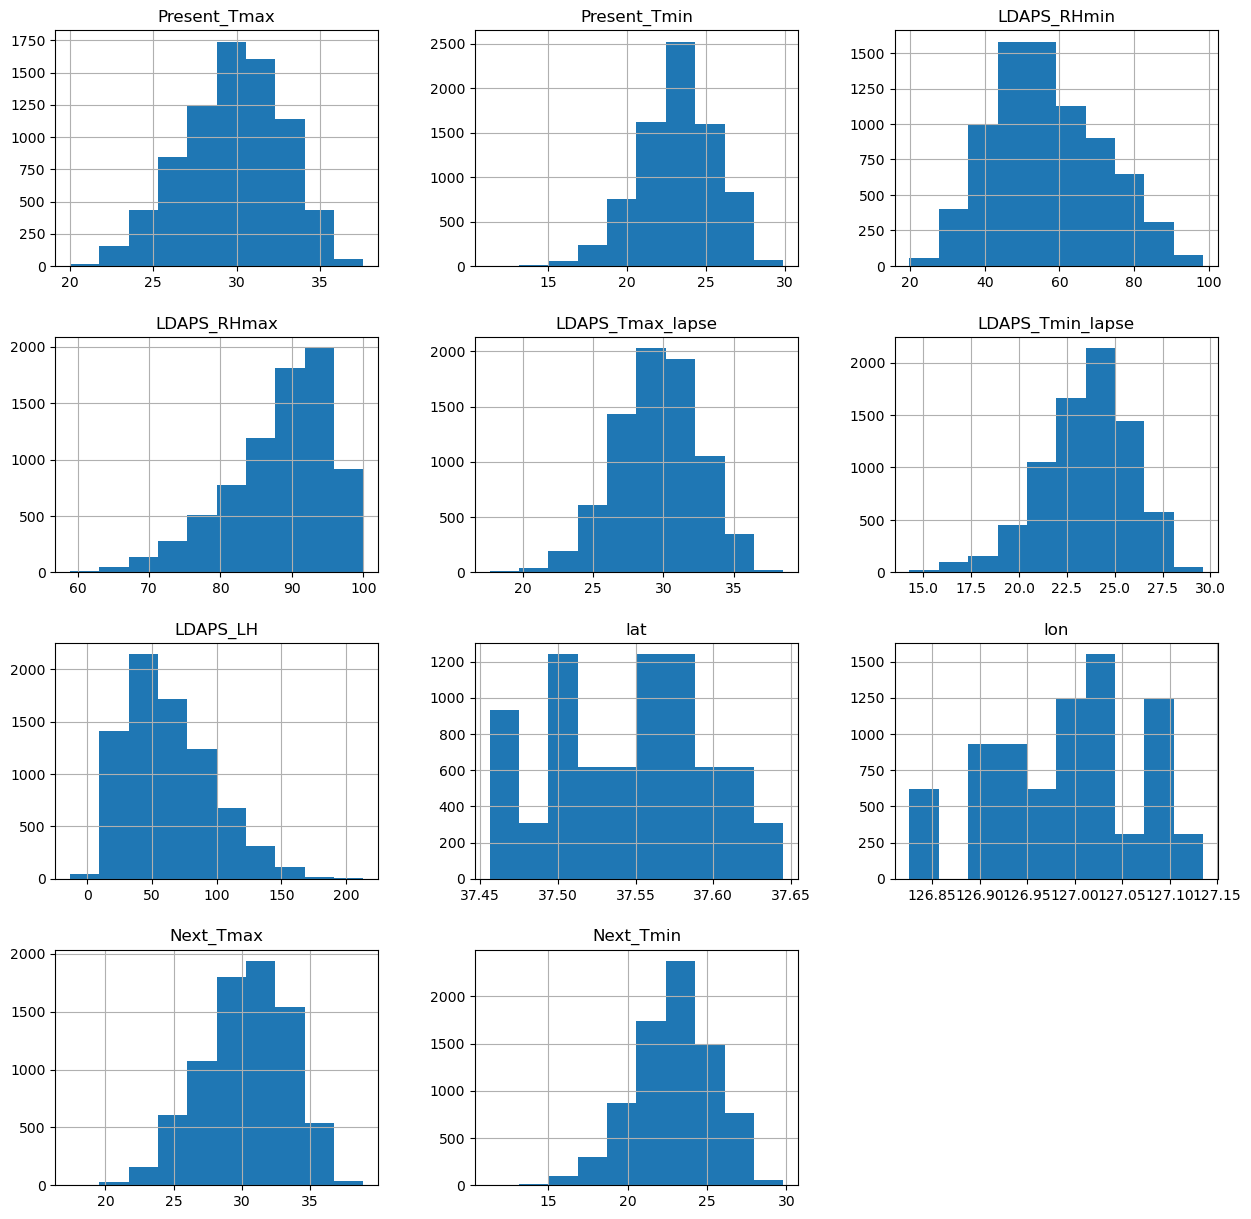

In [22]:
temp_df.hist(bins=10,figsize=(15,15))

In [23]:
weather_y=temp_df.pop("LDAPS_LH")
weather_x=temp_df

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [24]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [25]:
train_X.shape

(6201, 10)

In [26]:
train_y.shape

(6201,)

#### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [27]:
train_y.head()

Date
2017-08-13     37.152219
2016-07-18    128.492231
2014-07-04     49.793324
2013-07-16    100.062555
2017-07-05    140.146132
Name: LDAPS_LH, dtype: float64

# Multiple Linear Regression

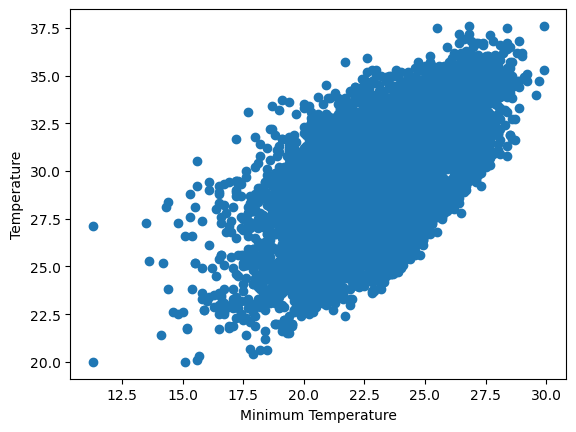

In [28]:
plt.scatter(temp_df.Present_Tmin, temp_df.Present_Tmax)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

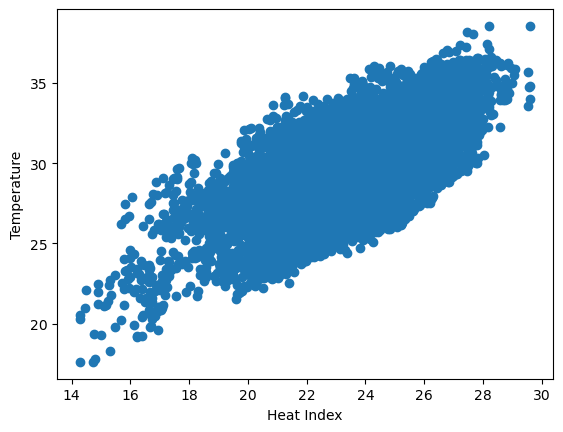

In [29]:
plt.scatter(temp_df.LDAPS_Tmin_lapse, temp_df.LDAPS_Tmax_lapse)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

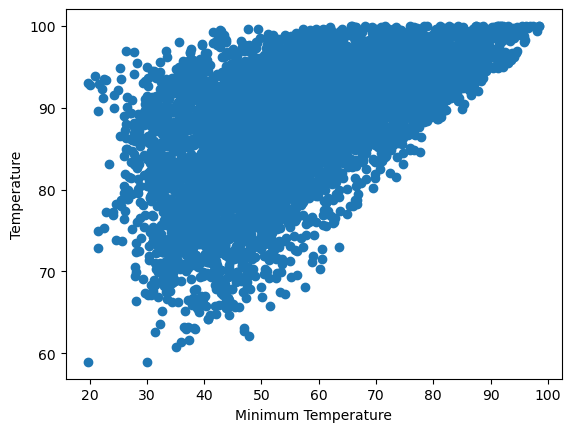

In [30]:
plt.scatter(temp_df.LDAPS_RHmin, temp_df.LDAPS_RHmax)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

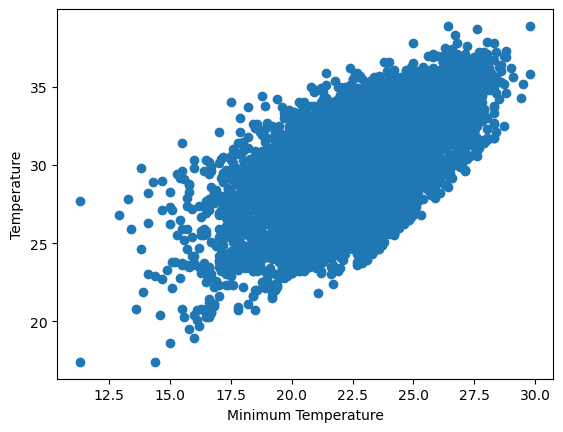

In [31]:
plt.scatter(temp_df.Next_Tmin, temp_df.Next_Tmax)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

# EDA

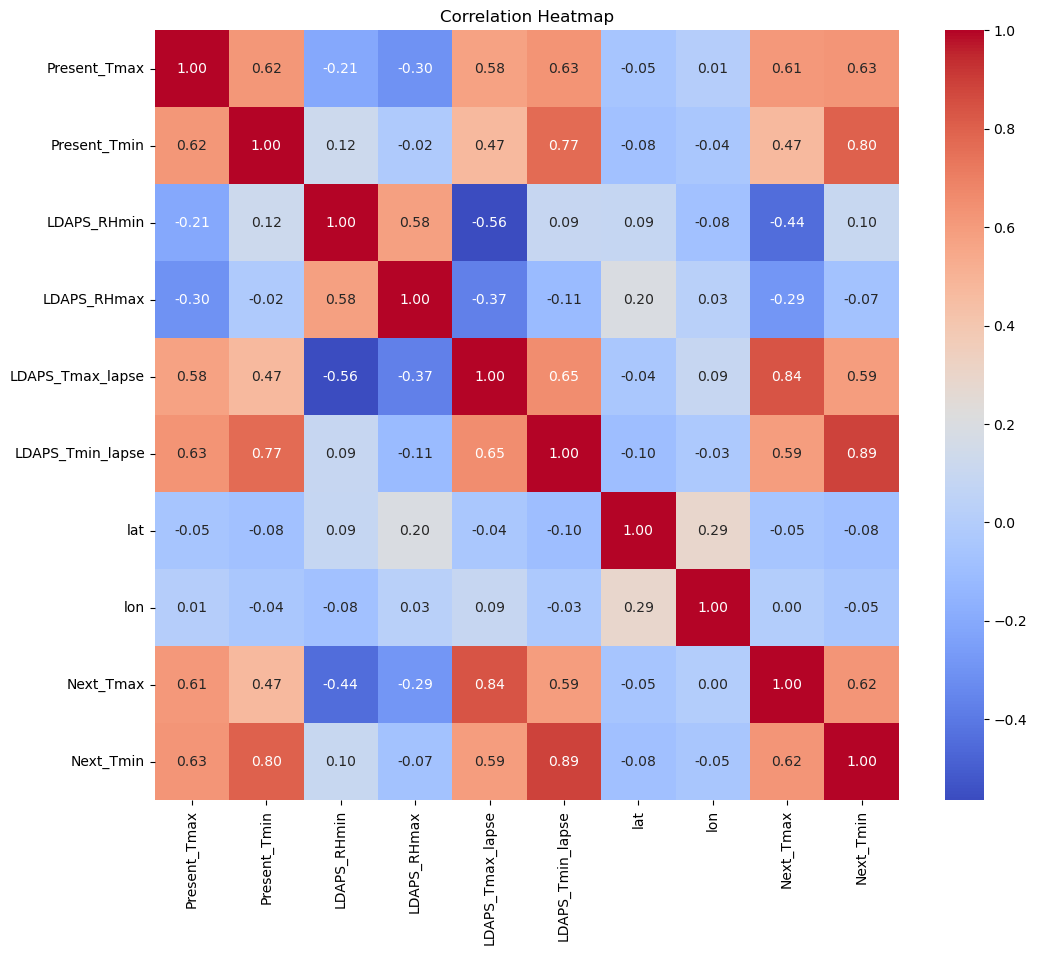

In [32]:
correlation_matrix = temp_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Skewness handling

Skewness of each feature:
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
lat                 0.087062
lon                -0.285213
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

Features with high skewness:
LDAPS_RHmax        -0.850870
LDAPS_Tmin_lapse   -0.578943
dtype: float64

Skewness after transformations:
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.959738
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.758322
lat                 0.087062
lon                -0.285213
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64


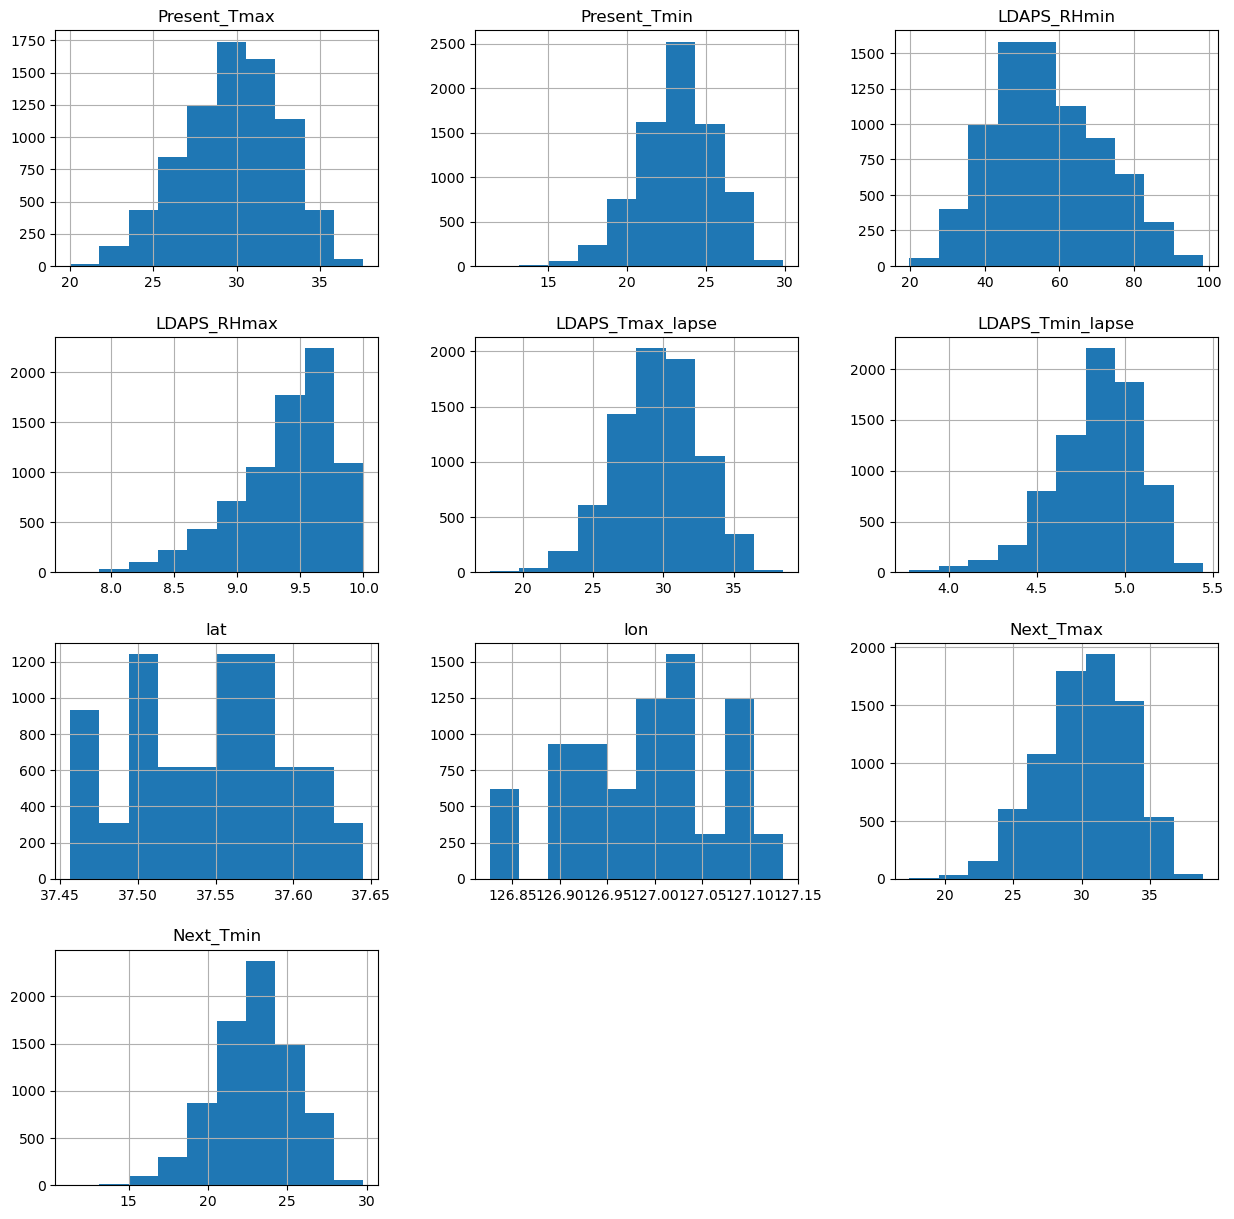

In [33]:
skewness = temp_df.skew()
print("Skewness of each feature:")
print(skewness)
skewness_threshold = 0.5

high_skewed_features = skewness[skewness.abs() > skewness_threshold]
print("\nFeatures with high skewness:")
print(high_skewed_features)

for feature in high_skewed_features.index:
    if high_skewed_features[feature] > 0:
        temp_df[feature] = np.log1p(temp_df[feature])
    else:
        temp_df[feature] = np.sqrt(temp_df[feature])
new_skewness = temp_df.skew()
print("\nSkewness after transformations:")
print(new_skewness)
temp_df.hist(bins=10, figsize=(15, 15))
plt.show()


# MODEL BUILDING:

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
imputer = SimpleImputer(strategy='mean')
weather_x_imputed = imputer.fit_transform(weather_x)
weather_y_imputed = imputer.fit_transform(weather_y.values.reshape(-1, 1)).ravel()
train_X, test_X, train_y, test_y = train_test_split(weather_x_imputed, weather_y_imputed, test_size=0.2, random_state=4)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = LinearRegression()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 22.779164039603444
Mean Squared Error (MSE): 836.3168148056227


In [36]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.26


In [37]:
np.mean(np.absolute(predictions-test_y))

22.779164039603444

In [38]:
for i in range(len(predictions)):
    predictions[i]=round(predictions[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':predictions,'diff':(test_y-predictions)})

,Actual,Prediction,diff
0,79.015101,63.20,15.815101
1,118.485468,77.83,40.655468
2,57.895334,21.22,36.675334
3,137.989886,74.81,63.179886
4,39.003622,81.05,-42.046378
...,...,...,...
1546,79.830445,78.50,1.330445
1547,13.247850,65.10,-51.852150
1548,39.737980,71.52,-31.782020
1549,52.169573,62.67,-10.500427


# Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [40]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

14.634423781042084

In [41]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.64


In [42]:
for i in range(len(prediction2)):
    prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
0,79.015101,70.20,8.815101
1,118.485468,123.98,-5.494532
2,57.895334,54.38,3.515334
3,137.989886,139.35,-1.360114
4,39.003622,48.43,-9.426378
...,...,...,...
1546,79.830445,77.52,2.310445
1547,13.247850,17.43,-4.182150
1548,39.737980,38.03,1.707980
1549,52.169573,22.26,29.909573


# Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [44]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

10.684634128428737

In [45]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.80


In [46]:
for i in range(len(prediction3)):
    prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
0,79.015101,66.00,13.015101
1,118.485468,125.29,-6.804532
2,57.895334,59.18,-1.284666
3,137.989886,139.76,-1.770114
4,39.003622,51.96,-12.956378
...,...,...,...
1546,79.830445,90.13,-10.299555
1547,13.247850,18.52,-5.272150
1548,39.737980,25.04,14.697980
1549,52.169573,47.61,4.559573


# Calculating R2-score for Multiple Linear Regression

In [47]:
from sklearn.metrics import r2_score

In [48]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predictions ) )

Mean absolute error: 22.78
Residual sum of squares (MSE): 836.31
R2-score: 0.26


# Calculating R2-score for Decision Tree Regression

In [49]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 14.63
Residual sum of squares (MSE): 402.69
R2-score: 0.64


# Calculating R2-score for Random Forest Regression

In [50]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 10.68
Residual sum of squares (MSE): 221.65
R2-score: 0.80


# Ridge

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

alpha_value = 1.0  
ridge_model = Ridge(alpha=alpha_value)

ridge_model.fit(train_X, train_y)

ridge_predictions = ridge_model.predict(test_X)
mae_ridge = mean_absolute_error(test_y, ridge_predictions)
mse_ridge = mean_squared_error(test_y, ridge_predictions)
r2_ridge = r2_score(test_y, ridge_predictions)

print(f"Ridge Regression - Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Ridge Regression - R2-score: {r2_ridge:.2f}")

Ridge Regression - Mean Absolute Error (MAE): 22.78
Ridge Regression - Mean Squared Error (MSE): 836.37
Ridge Regression - R2-score: 0.26


# SVR

In [52]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr_model.fit(train_X, train_y)

svr_predictions = svr_model.predict(test_X)
mae_svr = mean_absolute_error(test_y, svr_predictions)
mse_svr = mean_squared_error(test_y, svr_predictions)
r2_svr = r2_score(test_y, svr_predictions)

print(f"SVR - Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"SVR - R2-score: {r2_svr:.2f}")

SVR - Mean Absolute Error (MAE): 26.31
SVR - Mean Squared Error (MSE): 1121.62
SVR - R2-score: 0.00


# GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,  
    max_depth=3,  
    random_state=0
)

gbr_model.fit(train_X, train_y)

gbr_predictions = gbr_model.predict(test_X)

mae_gbr = mean_absolute_error(test_y, gbr_predictions)
mse_gbr = mean_squared_error(test_y, gbr_predictions)
r2_gbr = r2_score(test_y, gbr_predictions)

print(f"Gradient Boosting Regressor - Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Gradient Boosting Regressor - Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Gradient Boosting Regressor - R2-score: {r2_gbr:.2f}")

Gradient Boosting Regressor - Mean Absolute Error (MAE): 12.54
Gradient Boosting Regressor - Mean Squared Error (MSE): 266.47
Gradient Boosting Regressor - R2-score: 0.76


# cross validation

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)

r2_scores = cross_val_score(gbr_model, weather_x_imputed, weather_y_imputed, cv=kf, scoring='r2')

mean_r2_score = np.mean(r2_scores)
std_r2_score = np.std(r2_scores)

mae_scores = cross_val_score(gbr_model, weather_x_imputed, weather_y_imputed, cv=kf, scoring='neg_mean_absolute_error')

mean_mae_score = np.mean(-mae_scores)  
std_mae_score = np.std(-mae_scores)

mse_scores = cross_val_score(gbr_model, weather_x_imputed, weather_y_imputed, cv=kf, scoring='neg_mean_squared_error')

mean_mse_score = np.mean(-mse_scores)  
std_mse_score = np.std(-mse_scores)

print(f"Mean R2-score from {k}-Fold Cross-Validation: {mean_r2_score:.2f}")
print(f"Standard deviation of R2-score: {std_r2_score:.2f}")
print(f"Mean Absolute Error (MAE): {mean_mae_score:.2f}")
print(f"Standard deviation of MAE: {std_mae_score:.2f}")
print(f"Mean Squared Error (MSE): {mean_mse_score:.2f}")
print(f"Standard deviation of MSE: {std_mse_score:.2f}")


Mean R2-score from 5-Fold Cross-Validation: 0.78
Standard deviation of R2-score: 0.01
Mean Absolute Error (MAE): 12.16
Standard deviation of MAE: 0.12
Mean Squared Error (MSE): 246.80
Standard deviation of MSE: 5.98


# final Decision

cross validation provide batter predction.

# Saving Model:

In [62]:
import joblib
gbr_model.fit(train_X, train_y)

model_filename = 'gbr_model.pkl'  

joblib.dump(gbr_model, model_filename)

print(f"Model saved to file: {model_filename}")

Model saved to file: gbr_model.pkl
